# Principal Component Analysis (CPA) 2.0

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_data = scaler.transform(df)

In [11]:
# PCA
from sklearn.decomposition import PCA

In [12]:
# Find the 2 principals components
pca = PCA(n_components=2)

In [13]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [14]:
x_pca = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(569, 30)

In [16]:
x_pca.shape

(569, 2)

In [17]:
# Make a df for the 2 principal component and the Tumor Variable
pca_df = pd.DataFrame(data=[x_pca[:,0], x_pca[:,1], cancer["target"]]).T
# Set up the columns names
pca_df.columns = ["First principal component", 'Second Principal Component', "Tumors"]

In [18]:
# Put the right labels for the tumors columns
pca_df["Tumors"] = pca_df["Tumors"].apply(lambda x: cancer.target_names[1] if x == 1 else cancer.target_names[0])

In [19]:
pca_df.head()

,First principal component,Second Principal Component,Tumors
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant


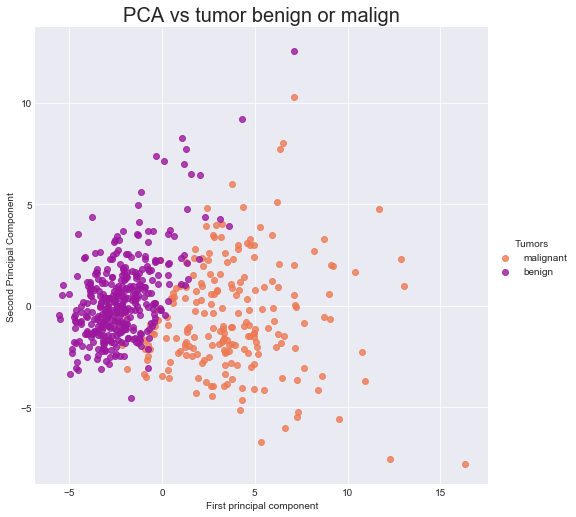

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.lmplot("First principal component", "Second Principal Component", pca_df, fit_reg=False, hue="Tumors", 
           palette="plasma_r", size=7)
plt.title("PCA vs tumor benign or malign", fontsize=20)

In [21]:
x_pca.shape

(569, 2)

## We can see the weights of the differents features for the two principals components

In [22]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [23]:
pca.components_.shape

(2, 30)

In [24]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [25]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


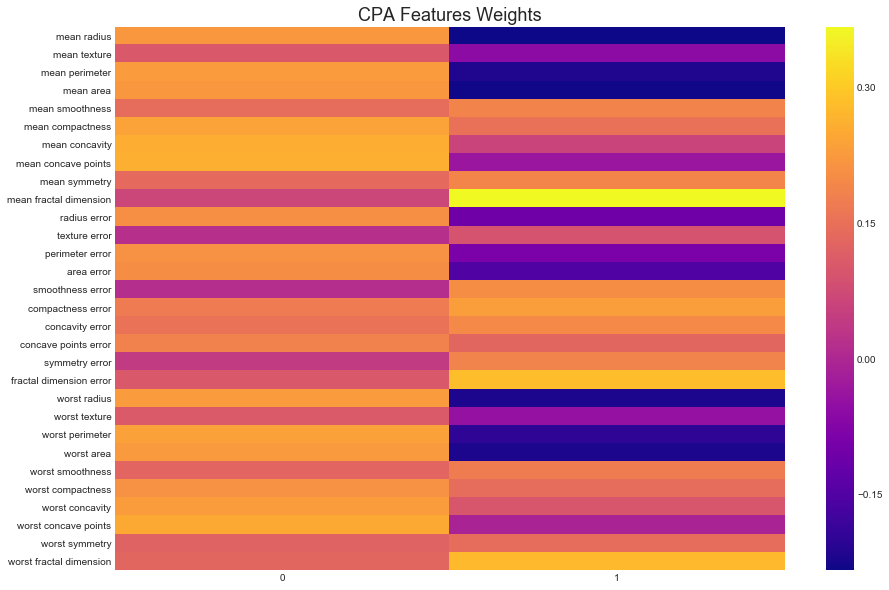

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df_comp.T,cmap='plasma')
plt.title("CPA Features Weights", fontsize=18)

In [27]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


# Let's make it more clear 
(Sorted weights of the features for both principal conponents)

In [28]:
# Sort by importance the features in the First principal component
df_comp0 = pd.DataFrame(df_comp.loc[0])
df_comp0.columns= ["First principal component"]
df_comp0.sort_values(by="First principal component", ascending = False, inplace=True)

In [29]:
# Let's do the same for the Second Principal Component
df_comp1 = pd.DataFrame(df_comp.loc[1])
df_comp1.columns= ["Second principal component"]
df_comp1.sort_values(by="Second principal component", ascending = False, inplace=True)

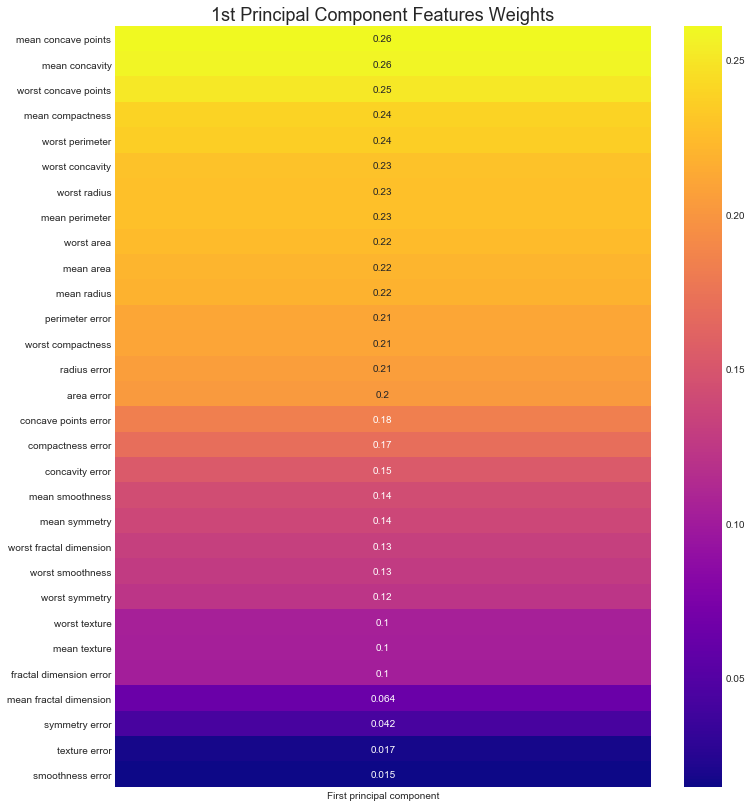

In [30]:
plt.figure(figsize=(12,14))
sns.heatmap(df_comp0,cmap='plasma', annot=True)
plt.title("1st Principal Component Features Weights", fontsize=18)

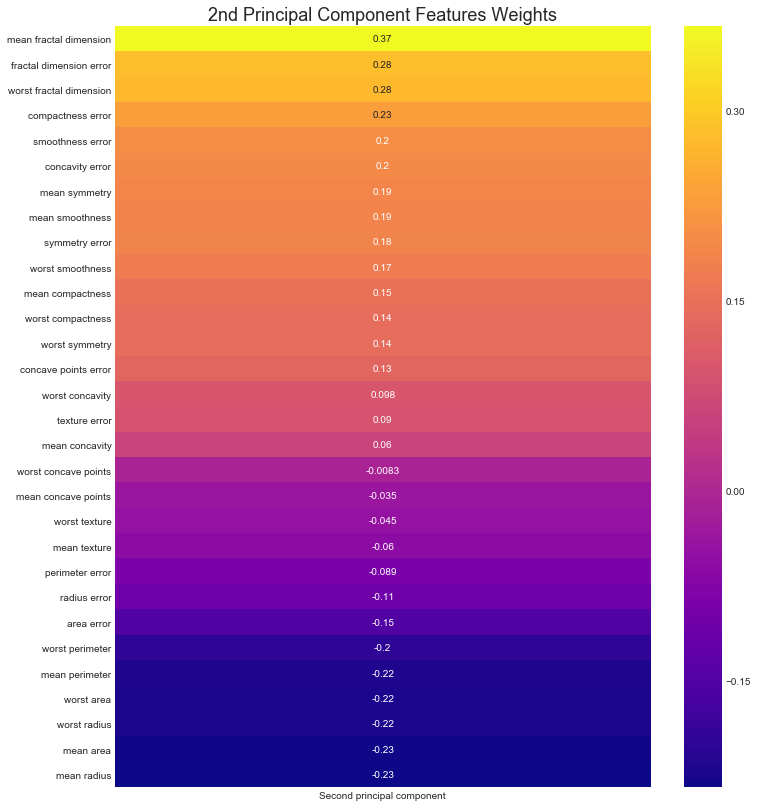

In [31]:
plt.figure(figsize=(12,14))
sns.heatmap(df_comp1,cmap='plasma', annot=True)
plt.title("2nd Principal Component Features Weights", fontsize=18)

In [32]:
pca_df.head()

,First principal component,Second Principal Component,Tumors
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant


# Let's make some ML now:

# First let's test a SVC

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = pca_df.drop("Tumors", axis=1)
y = pca_df["Tumors"].apply(lambda x: 1 if x == "malignant" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [35]:
# Using a SVC
from sklearn.svm import SVC
# Instantiate
svc = SVC()

# fit the model
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
predictions = svc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       113
          1       0.86      0.93      0.89        58

avg / total       0.93      0.92      0.92       171



[[104   9]
 [  4  54]]


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {"C": np.arange(0.01, 5, 0.5), "gamma": np.arange(0, 1, 0.1)}

In [41]:
# Instantiate the model
grid = GridSearchCV(svc, param_grid, verbose=2, n_jobs=-1)

# Fit the model
grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.01, gamma=0.0 ...............................................
[CV] C=0.01, gamma=0.0 ...............................................
[CV] C=0.01, gamma=0.0 ...............................................
[CV] ................................ C=0.01, gamma=0.0, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.0, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.0, total=   0.0s
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.2 ...............................................
[CV] C=0.01, gamma=0.2 ...............................................
[CV] C=0.01, gamma=0.2 ...............................................
[CV] .........

[CV] ................................ C=1.01, gamma=0.6, total=   0.0s
[CV] C=0.51, gamma=0.2 ...............................................
[CV] C=1.01, gamma=0.6 ...............................................
[CV] ................................ C=1.51, gamma=0.8, total=   0.0s
[CV] C=1.51, gamma=0.9 ...............................................
[CV] ................................ C=1.51, gamma=0.5, total=   0.0s
[CV] C=1.51, gamma=0.5 ...............................................
[CV] ................................ C=0.51, gamma=0.2, total=   0.0s
[CV] ................................ C=1.51, gamma=0.0, total=   0.0s
[CV] ................................ C=0.01, gamma=0.7, total=   0.0s
[CV] C=0.51, gamma=0.3 ...............................................
[CV] ................................ C=1.01, gamma=0.6, total=   0.0s
[CV] C=1.51, gamma=0.0 ...............................................
[CV] C=0.01, gamma=0.8 ...............................................
[CV] C

[CV] ................................ C=1.01, gamma=0.2, total=   0.0s
[CV] ................................ C=2.01, gamma=0.7, total=   0.0s
[CV] ................................ C=2.01, gamma=0.2, total=   0.0s
[CV] C=1.01, gamma=0.2 ...............................................
[CV] ................................ C=0.51, gamma=0.7, total=   0.0s
[CV] C=2.01, gamma=0.7 ...............................................
[CV] ................................ C=0.01, gamma=0.9, total=   0.0s
[CV] C=2.01, gamma=0.2 ...............................................
[CV] C=0.51, gamma=0.7 ...............................................
[CV] C=2.51, gamma=0.2 ...............................................
[CV] ................................ C=1.51, gamma=0.7, total=   0.1s
[CV] ................................ C=1.01, gamma=0.2, total=   0.0s
[CV] ................................ C=2.01, gamma=0.3, total=   0.0s
[CV] ................................ C=2.01, gamma=0.2, total=   0.0s
[CV] C

[CV] C=2.51, gamma=0.4 ...............................................
[CV] ................................ C=3.01, gamma=0.6, total=   0.0s
[CV] C=3.01, gamma=0.7 ...............................................
[CV] ................................ C=3.51, gamma=0.2, total=   0.0s
[CV] C=3.51, gamma=0.2 ...............................................
[CV] ................................ C=3.01, gamma=0.3, total=   0.0s
[CV] C=3.01, gamma=0.3 ...............................................
[CV] ................................ C=2.01, gamma=0.5, total=   0.0s
[CV] ................................ C=3.01, gamma=0.7, total=   0.0s
[CV] ................................ C=2.51, gamma=0.4, total=   0.0s
[CV] ................................ C=3.51, gamma=0.6, total=   0.0s
[CV] C=3.01, gamma=0.7 ...............................................
[CV] ................................ C=3.51, gamma=0.2, total=   0.0s
[CV] C=2.01, gamma=0.5 ...............................................
[CV] C

[CV] ................................ C=2.01, gamma=0.9, total=   0.1s
[CV] ................................ C=2.51, gamma=0.8, total=   0.0s
[CV] C=4.01, gamma=0.5 ...............................................
[CV] C=2.51, gamma=0.0 ...............................................
[CV] C=2.51, gamma=0.9 ...............................................
[CV] ................................ C=3.51, gamma=0.0, total=   0.0s
[CV] ................................ C=3.51, gamma=0.9, total=   0.0s
[CV] ................................ C=4.01, gamma=0.0, total=   0.0s
[CV] C=3.51, gamma=0.9 ...............................................
[CV] C=4.01, gamma=0.1 ...............................................
[CV] C=4.51, gamma=0.8 ...............................................
[CV] ................................ C=4.01, gamma=0.5, total=   0.0s
[CV] ................................ C=2.51, gamma=0.0, total=   0.0s
[CV] C=2.51, gamma=0.0 ...............................................
[CV] C

[CV] ................................ C=4.51, gamma=0.3, total=   0.0s
[CV] C=4.51, gamma=0.3 ...............................................
[CV] ................................ C=4.01, gamma=0.4, total=   0.0s
[CV] ................................ C=4.51, gamma=0.6, total=   0.0s
[CV] C=4.01, gamma=0.4 ...............................................
[CV] C=4.51, gamma=0.6 ...............................................
[CV] ................................ C=4.51, gamma=0.3, total=   0.0s
[CV] ................................ C=4.01, gamma=0.4, total=   0.0s
[CV] ................................ C=4.51, gamma=0.6, total=   0.0s
[CV] C=4.51, gamma=0.6 ...............................................
[CV] ................................ C=4.51, gamma=0.6, total=   0.0s
[CV] C=4.51, gamma=0.7 ...............................................
[CV] ................................ C=4.51, gamma=0.7, total=   0.0s
[CV] C=4.51, gamma=0.7 ...............................................
[CV] .

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.01,  0.51,  1.01,  1.51,  2.01,  2.51,  3.01,  3.51,  4.01,  4.51]), 'gamma': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [42]:
grid.best_params_

{'C': 1.01, 'gamma': 0.30000000000000004}

In [43]:
grid.best_estimator_

SVC(C=1.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.30000000000000004,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
grid_predictions = grid.predict(X_test)

In [45]:
print(classification_report(y_test, grid_predictions))
print("\n")
print(confusion_matrix(y_test, grid_predictions))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       113
          1       0.86      0.93      0.89        58

avg / total       0.93      0.92      0.92       171



[[104   9]
 [  4  54]]


# Let's compare it to a logreg

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(random_state=25)

logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

In [48]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97       113
          1       0.92      0.97      0.94        58

avg / total       0.96      0.96      0.96       171



[[108   5]
 [  2  56]]


# Check vs a normal logreg (no PCA) / with all the features


In [49]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [50]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

In [51]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      0.86      0.89        58
          1       0.93      0.96      0.95       113

avg / total       0.93      0.93      0.93       171



[[ 50   8]
 [  4 109]]


# Using PCA with 2 variables makes an imporvement of 3% !

In [52]:
param_grid = {'C': np.power(10.0, np.arange(-10, 10)), 'solver': ['newton-cg']}
# Instantiate the model
grid = GridSearchCV(logreg, param_grid, verbose=2, n_jobs=-1)

# Fit the model
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1e-10, solver=newton-cg .......................................
[CV] C=1e-10, solver=newton-cg .......................................
[CV] C=1e-10, solver=newton-cg .......................................
[CV] C=1e-09, solver=newton-cg .......................................
[CV] C=1e-09, solver=newton-cg .......................................
[CV] C=1e-08, solver=newton-cg .......................................
[CV] C=1e-09, solver=newton-cg .......................................
[CV] C=1e-08, solver=newton-cg .......................................
[CV] ........................ C=1e-08, solver=newton-cg, total=   0.0s
[CV] C=1e-08, solver=newton-cg .......................................
[CV] ........................ C=1e-08, solver=newton-cg, total=   0.0s
[CV] C=1e-07, solver=newton-cg .......................................
[CV] ........................ C=1e-07, solver=newton-cg, total=   0.0s
[CV] C=1e-07, so

/Users/Rioux/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV] ........................ C=1e-09, solver=newton-cg, total=   0.2s
[CV] C=1e-05, solver=newton-cg .......................................
[CV] ........................ C=1e-08, solver=newton-cg, total=   0.2s
[CV] C=0.001, solver=newton-cg .......................................
[CV] ........................ C=1e-07, solver=newton-cg, total=   0.1s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ........................ C=1e-06, solver=newton-cg, total=   0.2s
[CV] C=10.0, solver=newton-cg ........................................
[CV] ........................ C=1e-07, solver=newton-cg, total=   0.2s
[CV] C=1000.0, solver=newton-cg ......................................
[CV] ........................ C=1e-06, solver=newton-cg, total=   0.3s
[CV] C=100000.0, solver=newton-cg ....................................
[CV] ........................ C=1e-06, solver=newton-cg, total=   0.3s
[CV] C=10000000.0, solver=newton-cg ..................................
[CV] .

[Parallel(n_jobs=-1)]: Done  14 out of  60 | elapsed:    0.5s remaining:    1.6s
/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .......................... C=0.1, solver=newton-cg, total=   0.6s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ..................... C=100000.0, solver=newton-cg, total=   0.4s
[CV] C=100000.0, solver=newton-cg ....................................
[CV] ........................ C=1e-05, solver=newton-cg, total=   0.3s
[CV] C=0.0001, solver=newton-cg ......................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ......................... C=10.0, solver=newton-cg, total=   0.7s
[CV] C=10.0, solver=newton-cg ........................................
[CV] ........................ C=0.001, solver=newton-cg, total=   0.4s
[CV] C=0.01, solver=newton-cg ........................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................. C=1000000000.0, solver=newton-cg, total=   0.5s
[CV] C=1000000000.0, solver=newton-cg ................................
[CV] ....................... C=0.0001, solver=newton-cg, total=   0.3s
[CV] C=0.0001, solver=newton-cg ......................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.2s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ....................... C=0.0001, solver=newton-cg, total=   0.1s
[CV] ................... C=10000000.0, solver=newton-cg, total=   0.8s
[CV] C=10000000.0, solver=newton-cg ..................................
[CV] C=0.0001, solver=newton-cg ......................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ....................... C=1000.0, solver=newton-cg, total=   1.0s
[CV] C=1000.0, solver=newton-cg ......................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.6s
[CV] C=1.0, solver=newton-cg .........................................
[CV] ......................... C=10.0, solver=newton-cg, total=   0.7s
[CV] C=100.0, solver=newton-cg .......................................
[CV] ....................... C=0.0001, solver=newton-cg, total=   0.4s
[CV] C=0.001, solver=newton-cg .......................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................... C=10000000.0, solver=newton-cg, total=   0.4s
[CV] C=100000000.0, solver=newton-cg .................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ..................... C=100000.0, solver=newton-cg, total=   1.0s
[CV] C=1000000.0, solver=newton-cg ...................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.6s
[CV] C=0.01, solver=newton-cg ........................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ....................... C=1000.0, solver=newton-cg, total=   0.5s
[CV] C=10000.0, solver=newton-cg .....................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................. C=1000000000.0, solver=newton-cg, total=   0.8s
[CV] .......................... C=1.0, solver=newton-cg, total=   0.5s
[CV] C=1.0, solver=newton-cg .........................................
[CV] ........................ C=0.001, solver=newton-cg, total=   0.3s
[CV] .......................... C=1.0, solver=newton-cg, total=   0.2s
[CV] C=1.0, solver=newton-cg .........................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.4s
[CV] C=0.1, solver=newton-cg .........................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ........................ C=100.0, solver=newton-cg, total=   0.6s
[CV] C=100.0, solver=newton-cg .......................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .................. C=100000000.0, solver=newton-cg, total=   0.5s
[CV] C=100000000.0, solver=newton-cg .................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .................... C=1000000.0, solver=newton-cg, total=   0.6s
[CV] C=1000000.0, solver=newton-cg ...................................
[CV] .......................... C=1.0, solver=newton-cg, total=   0.3s
[CV] C=10.0, solver=newton-cg ........................................
[CV] ........................ C=100.0, solver=newton-cg, total=   0.2s
[CV] C=100.0, solver=newton-cg .......................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ...................... C=10000.0, solver=newton-cg, total=   0.6s
[CV] C=10000.0, solver=newton-cg .....................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.5s
[CV] .................. C=100000000.0, solver=newton-cg, total=   0.5s
[CV] C=100000000.0, solver=newton-cg .................................
[CV] ......................... C=10.0, solver=newton-cg, total=   0.4s
[CV] .................... C=1000000.0, solver=newton-cg, total=   0.5s
[CV] C=1000000.0, solver=newton-cg ...................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ...................... C=10000.0, solver=newton-cg, total=   0.5s
[CV] C=10000.0, solver=newton-cg .....................................
[CV] ........................ C=100.0, solver=newton-cg, total=   0.5s
[CV] C=1000.0, solver=newton-cg ......................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .................... C=1000000.0, solver=newton-cg, total=   0.2s
[CV] C=10000000.0, solver=newton-cg ..................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .................. C=100000000.0, solver=newton-cg, total=   0.5s
[CV] C=1000000000.0, solver=newton-cg ................................


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ....................... C=1000.0, solver=newton-cg, total=   0.3s


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ...................... C=10000.0, solver=newton-cg, total=   0.4s
[CV] C=100000.0, solver=newton-cg ....................................
[CV] ................... C=10000000.0, solver=newton-cg, total=   0.3s


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................. C=1000000000.0, solver=newton-cg, total=   0.3s


/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ..................... C=100000.0, solver=newton-cg, total=   0.1s


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09]), 'solver': ['newton-cg']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [53]:
grid.best_params_

{'C': 100.0, 'solver': 'newton-cg'}

In [54]:
grid.best_estimator_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
grid_pred = grid.predict(X_test)

In [56]:
print(classification_report(y_test, grid_pred))
print("\n")
print(confusion_matrix(y_test, grid_pred))

             precision    recall  f1-score   support

          0       0.94      0.88      0.91        58
          1       0.94      0.97      0.96       113

avg / total       0.94      0.94      0.94       171



[[ 51   7]
 [  3 110]]
